<a href="https://colab.research.google.com/github/ProtossDragoon/Deep-Learning-with-Python/blob/main/chapter5_%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84%EC%9D%84%EC%9C%84%ED%95%9C%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

In [ ]:
layer_output = model.get_layer(layer_name).output
# layer_output 은 해당 레이어를 가리키는 화살표!

import tensorflow.keras.backend as K
# keras backend 라고 하는 것이 이해가 되지 않을 수 있습니다.
# keras 에서 그냥 냅다 layer 을 쌓고 하는 것은, 상대적으로 high level 기능이라고 할 수 있고,
# keras.backend 는 조금 더 구체적인 도구들을 제공하는 - 잘 정리된 도구 상자라고 생각할 수 있습니다.
'''
loss = K.mean(layer_output[:, :, :, filter_index])
'''
# layer_output[:, :, :, filter_index] : 모든 배치에 대해서, 하나의 필터의 결과물을 가져오겠다는 뜻.
# 그 필터 결과물의 총합 (평균이니까 총합과 같다고 생각) 을 loss 로 정의함.
# 신경망은 필터 결과물의 총합을 감소시키도록 경사하강할 것입니다.


'''
grads = K.gradients(loss, model.input)[0]
'''
# 먼저 api 문서의 정의를 살펴보면,
# K.gradients
# Returns the gradients of loss with respect to variables.
# model 의 input 에 대한 loss 의 gradient 를 보관합니다.
# d(Loss)/d(Input) : input 에 대한 Loss 의 변화량. Loss 는 R1 (실수 1차원) 의 원소, Input 은 R3 (실수 3차원) 의 원소. (3차원인 이유 : 배치가 0이니까.)
# 개중에서도 [0] 번째 index 라는 것은, 배치 중 첫 번째를 의미할 것임! -> 이해가 안 된다면, chapter2 에서 공부했던 차원을 다시 찾아볼 것!

'\ngrads = K.gradients(loss, model.input)[0]\n'

In [ ]:
# colab 은 기본적으로 항상 tensorflow 를 최신판으로 유지하기 때문에,
# 책이 쓰여졌을 당시 tensorflow 1.xx 의 모듈인 keras 와 달라진 점을 반영하지 못합니다.
# 추측해보건데, grads = K.gradients(loss, model.input)[0] 는 아래 코드로 대체할 수 있습니다.

with tf.GradientTape() as tape:
  # tf.GradientTape() as tape 
  # 당연히 api 문서를 먼저 읽어 보아야 합니다.
  '''
  Record operations for automatic differentiation.
  Operations are recorded if they are executed within this context manager and
  at least one of their inputs is being "watched".
  '''
  # 대충, 여기 tape scope 안에서 일어나는 연산들을 "기록하고 지켜본다" 라는 맥락입니다.
  
  loss = K.mean(layer_output[:, :, :, filter_index])

grad = tape.gradient(loss, model.input)[0]
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

TypeError: ignored

# 으아 ! 답답해 !

- 원래 버전 맞추는 것이 가장 답답하고 힘든 작업이지요.
우리는 이럴바에 그냥 Tensorflow 로 구현을 해 보도록 합시다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

In [2]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'

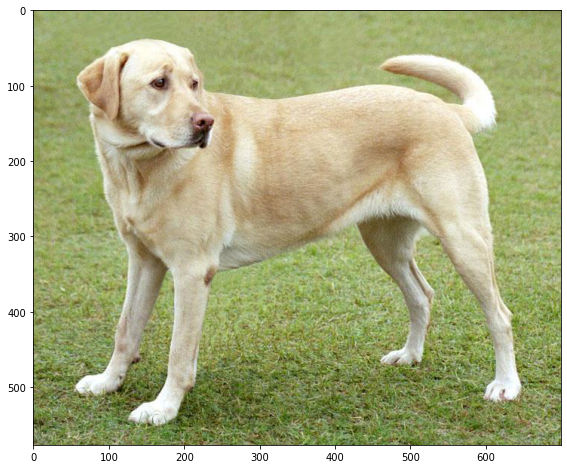

In [25]:
# 이미지를 내려받아 넘파이 배열로 변환하는 함수입니다.
# 말 그대로 그냥 url 로부터 하나 다운받겠다는 뜻.
def download(url, max_dim=None):
  name = url.split('/')[-1]
  image_path = tf.keras.utils.get_file(name, origin=url)
  img = PIL.Image.open(image_path)
  if max_dim:
    img.thumbnail((max_dim, max_dim))
  return np.array(img)

original_img = download(url)
plt.figure(figsize = [13, 8])
plt.imshow(original_img)

In [4]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
for layer in base_model.layers :
  print(layer.name)

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
activation_12
activation_14
activation_17
activation_18
mixed1
conv2d_22
batch_normalization_22
activation_22
conv2d

In [6]:
names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in names]
print(layers)

dream_model = tf.keras.Model(base_model.input, layers)

[<tf.Tensor 'mixed3/concat:0' shape=(None, None, None, 768) dtype=float32>, <tf.Tensor 'mixed5/concat:0' shape=(None, None, None, 768) dtype=float32>]


In [45]:
class DeepDream(tf.Module):
  def __init__(self, model):
    super(DeepDream, self).__init__()
    self.model = model

  '''
  이 작업을 수행하는 아래의 함수는 성능을 최적화하기 위해 tf.function으로 감쌉니다. 
  이 함수는 input_signature를 이용해 함수가 다른 이미지 크기 혹은 step/step_size값에 대해 트레이싱(tracing)되지 않도록 합니다. 
  보다 자세한 설명을 위해서는 Concrete functions guide (https://www.tensorflow.org/guide/function?hl=ko) 를 참조합니다.
  ---
  조금 풀어 설명하자면,
  1. 성능을 향상시키기 위해 컴파일된 그래프로 만들어버리는 방법이 데코레이터 tf.function() 을 이용하는 방법인데
  2. tf.function() 의 argument 로 input_signature = [] 을 통해 input type 을 제한할 수 있다는 이야기.
  이때, tf.function() 을 추가하게 되면 속도상 이점은 생기지만, 디버깅이 어려워지므로 정상적으로 동작하는 것을 확인한 후 감쌀 것을 권장함.
  그리고, 왜인지는 모르겠으나, tf.function() 으로 감싸게 되었을 때, 결과 이미지의 성능이 더 좋은 것으로 보아, 속도를 너머 어떤 중요한 차이가 있지 않을까 싶음.
  궁금하면 주석 구역을 주석처리하고 돌려 보고, 주석처리하지 않고 돌려 보기를. 결과 이미지 퀄리티차이가 매우 큼.
  '''
  
  # 주석 구역 --
  # '''
  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
  # '''
  # 주석 구역 --
  
  def __call__(self, img_tensor, steps, step_size):
      print("Tracing")
      loss = tf.constant(0.0)
      # 여담이고, 조금 신기한 이슈인데, 만약 @tf.function() 을 사용하게 된다면,
      # 무조건 loss 를 담는 변수를 for 이든 while 이든 loop 이전에 선언을 하고,
      # 그 loop 이전에 선언한 loss 를 담는 변수명은 무조건 'loss' 여야 한다는 것.. 아니면 오류를 뿜어버림.
      
      for n in tf.range(steps):
        with tf.GradientTape() as tape:
          # `img`에 대한 그래디언트가 필요합니다.
          # `GradientTape`은 기본적으로 오직 `tf.Variable`만 주시합니다.
          # 따라서, img 도 같이 관찰하게 합니다.
          tape.watch(img_tensor)

          img_tensor_one_batch = tf.expand_dims(img_tensor, axis = 0)
          layer_activations = dream_model(img_tensor_one_batch)
          # layer_activation : [output1, output2]
          # example : [shape(1,w_a,h_a,ch_a), shape(1,w_b,h_b,ch_b)]

          losses = []
          for activation in layer_activations :
            loss_activation = tf.keras.backend.mean(activation, keepdims=False)
            # loss : [전체평균(output1), 전체평균(output2)]
            # example : [shape(0), shape(0)] *참고 : shape(0) : 스칼라
            losses.append(loss_activation)
          loss = tf.keras.backend.sum(losses, keepdims=False)

          # L_final = L_mixed3 + L_mixed5
            # L_mixed3 = mean(activation_mixed3)
            # L_mixed5 = mean(activation_mixed5)

        # 입력 이미지의 각 픽셀에 대한 손실 함수의 그래디언트를 계산합니다.
        gradients = tape.gradient(loss, img_tensor)
        # gradients : shape(w_img, h_img, 3)

        # 그래디언트를 정규화합니다.
        gradients = (gradients - tf.keras.backend.mean(gradients, keepdims=False)) / (tf.keras.backend.std(gradients, keepdims=False) + 1e-8)
        # 정규화된 gradients = (gradients 각 픽셀 - gradients 전체 픽셀 평균) / gradients 전체 픽셀의 표준편차
        # 1e-8 은 0 으로 나누지 말라고 그냥 넣어주는 친구
        # keras.backend 대신 tf.math.reduce_mean(gradients) tf.math.reduce_std(gradients) 를 사용하는 것도 좋은 방법이 될 수 있음.

        # 경사상승법을 이용해 "손실" 최대화함으로써 입력 이미지가 선택한 층들을 보다 더 "흥분" 시킬 수 있도록 합니다.
        # (그래디언트와 이미지의. 차원이 동일하므로) 그래디언트를 이미지에 직접 더함으로써 이미지를 업데이트할 수 있습니다.
        img_tensor = img_tensor + (gradients * step_size)

        # Clipping 이라고 불리는 이 방법은, 어떤 Tensor 의 최대값과 최소값을 조절해주는 역할을 합니다.
        # 비슷한 맥락에서, Gradient 도 Clipping 할 수 있습니다.
        img_tensor = tf.clip_by_value(img_tensor, -1, 1)

      return loss, img_tensor

In [46]:
deepdream = DeepDream(dream_model)

image dtype :  <dtype: 'float32'>
Tracing
Step 0 ~ 100, loss 2.258305549621582


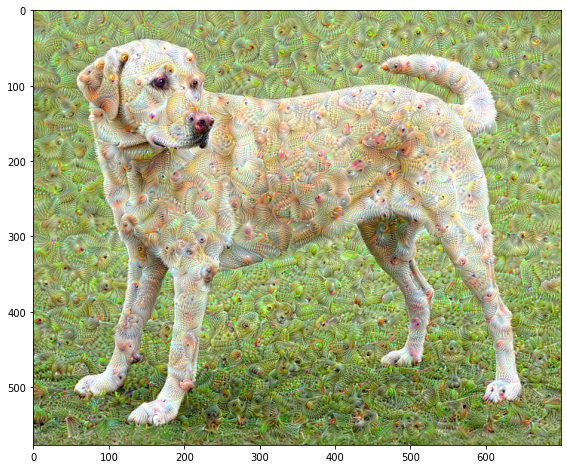

In [47]:
# 전처리된 이미지를 다시 되돌리는 함수입니다.
# 주의! 내 생각대로 이미지를 전/후처리하면 안 됩니다.
# 왜냐하면, 내가 아무리 합리적으로 전처리를 한다고 한들, 모델이 그에 맞추어 훈련되어있는 것이 아니라면, 모델에게는 완전히 다른 세상이 열린 것일 뿐이기 때문입니다.
# 모델이 훈련했을 때 사용했던 전처리 방법을 준수해야 합니다.
# 일반적으로, 그러한 방법들은 정확히 이해하기 어려우므로, 그냥 소스 코드를 그대로 사용하면 마음이 편합니다.
def deprocess(img_tensor):
  img_tensor = 255*(img_tensor + 1.0)/2.0
  # print('to scale : {} ~ {}'.format(img.min(), img.max()))
  # img = (img - img.min()) / (img.max() - img.min() + 1e-8)
  img_tensor = tf.cast(img_tensor, tf.uint8)
  # img = tf.cast(img, tf.float32)
  return img_tensor


def run_deep_dream_simple(img, steps=100, step_size=0.01):
  # 이미지를 모델에 순전파하기 위해 uint8 형식으로 변환합니다.
  # 아까 언급했듯이, 모델이 훈련 시 사용했던 전처|리 방식을 준수해야 합니다.
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  img = tf.convert_to_tensor(img)
  print('image dtype : ', img.dtype)
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    
    # step 제어부
    run_steps_per_loop = 100
    if steps_remaining>run_steps_per_loop:
      run_steps = tf.constant(run_steps_per_loop)
    else:
      run_steps = tf.constant(steps_remaining)

    steps_remaining -= run_steps
    step += run_steps

    loss, img = deepdream(img, run_steps, tf.constant(step_size))

    print ("Step {} ~ {}, loss {}".format(step - run_steps_per_loop, step, loss))

  
  result = deprocess(img)


  # pyplot based image visualization
  plt.figure(figsize = [13, 8])
  plt.imshow(result)

  # ipython display based image visualization
  '''
  import IPython.display as display
  display.clear_output(wait=True) # 단지 출력창 깨끗하게 만드는 기능
  display.display(PIL.Image.fromarray(np.array(result)))
  '''

  return result


dream_img = run_deep_dream_simple(img = original_img, 
                                  steps = 100, step_size = 0.01)